In [9]:
import pandas as pa
import numpy as np
from ta import *
test_file= 'E:\Stocks\Stocks Data\data\SBIN.csv'
df = pd.read_csv(test_file)
df.rename(columns={
        'Total Trade Quantity':'Volume',
        "Turnover (Lacs)":'turnover'
},inplace=True)
df = df[::-1]
df['atr'] =  average_true_range(df.High,df.Low,df.Close)
df['bb_diff'] =(  bollinger_hband(df.Close,n=14) - bollinger_lband(df.Close,n=14))
df['macd'] = ( macd(df.Close,12,34) )

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.style.use('seaborn')

In [5]:
def dropna(df):
    """Drop rows with "Nans" values
    """
    df = df[df < math.exp(709)] # big number
    df = df[df != 0.0]
    df = df.dropna()
    return df

def ema(series, periods, fillna=False):
    if fillna:
        return series.ewm(span=periods, min_periods=0).mean()
    return series.ewm(span=periods, min_periods=periods).mean()

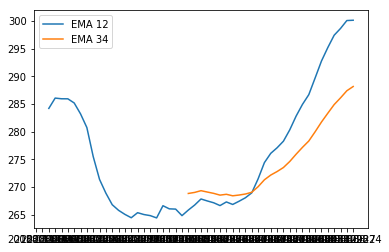

c:\users\rohit\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\users\rohit\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [6]:
tem = df[-300:]
temp = tem[::-1]
# plt.plot(temp.atr,label='atr')
temp = temp[:60]
plt.plot(ema(temp.Close,12),label='EMA 12')
plt.plot(ema(temp.Close,34),label='EMA 34')
plt.legend()
plt.show()
tem['ema-12'] = ema(tem.Close,12)
tem['ema-34'] = ema(tem.Close,34)

KeyError: '2017-09-07'

In [26]:
columns = ['Date','Open','High','Low','Last','Close','Total Trade Quantity','Turnover (Lacs)','atr','macd','EMA12','EMA34','Symbol']
tdf = pd.DataFrame(columns=columns)
tdf.set_index('Date')
tdf = tdf.fillna('Nan')
with open('E:\\Stocks\\Stocks Data\\data\\_nifty500.csv') as nifty:
    next(nifty) # to skip the first line.
    ct =0
    for line in nifty:
        line = line.strip().split(',')
        try:
            df = pa.read_csv("E:\\Stocks\\Stocks Data\\twoyears\\"+line[2]+'.csv',index_col=0)
            df = df[-1:]
            df['Symbol'] = [line[2]]
            print(df)
            tdf = pd.concat([tdf,df])
        except FileNotFoundError as e:
            print(line[2]+' is not found')
    tdf.to_csv('E:\\Stocks\\Stocks Data\\')

         Date     Open     High       Low      Last    Close  \
0  2018-11-22  20780.0  21100.0  20617.95  20889.95  20825.8   

   Total Trade Quantity  Turnover (Lacs)         atr        macd  \
0                1360.0           284.12  647.632385 -532.753693   

          EMA12         EMA34   Symbol  
0  20521.055333  21053.809027  3MINDIA  
         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-11-22  144.15  144.15  144.15  144.15  144.15               28759.0   

   Turnover (Lacs)       atr      macd       EMA12       EMA34   Symbol  
0            41.46  7.601231 -12.84422  117.214736  130.058956  8KMILES  


In [25]:
today = pa.read_csv('E:\\Stocks\\Stocks Data\\date_2018-11-22.csv')
today.set_index('Symbol')
today = today[::-1]
today = today.round(0)

macd_0 =(today['macd'] == 0)
macdsing_0 = (today['macd_sig'] == 0)
sig   = (today['EMA12'] - today['EMA34'])
sig_0 = (sig == 0 )
today[macd_0 & macdsing_0 &sig_0 ]
today.loc[today['Symbol']=='SUZLON']
# d = today.query("Date=='{0}'".format('2018-11-22'))


,Unnamed: 0,Close,Date,EMA12,EMA34,High,Last,Low,Open,Symbol,Total Trade Quantity,Turnover (Lacs),atr,macd,macd_sig,sig
419,0,6.0,2018-11-22,6.0,6.0,6.0,5.0,5.0,6.0,SUZLON,31027043.0,1744.0,0.0,-0.0,-0.0,NaN


In [22]:
def fun(date):
    columns = ['Date','Open','High','Low','Last','Close','Total Trade Quantity','Turnover (Lacs)','atr','macd','macd_sig','EMA12','EMA34','Symbol']
    tdf = pd.DataFrame(columns=columns)
    tdf.set_index('Date')
    tdf = tdf.fillna('Nan')
    with open('E:\\Stocks\\Stocks Data\\data\\_nifty500.csv') as nifty:
        next(nifty) # to skip the first line.
        ct =0
        for line in nifty:
            line = line.strip().split(',')
            try:
                df = pa.read_csv("E:\\Stocks\\Stocks Data\\twoyears\\"+line[2]+'.csv',index_col=1)
                df = df[::-1]
                df = df.query("Date=='{0}'".format(date))
                df['Symbol'] = [line[2]]
                tdf = pd.concat([tdf,df])
            except FileNotFoundError as e:
                print(line[2]+' is not found')
#         tdf.to_csv('E:\\Stocks\\Stocks Data\\date'+date+'.csv')
        return tdf
df = fun('2018-11-12')
print('*** Its Done ***')

C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


BAJAJ-AUTO is not found
GET&D is not found
HCL-INSYS is not found
IL&FSTRANS is not found
J&KBANK is not found
L&TFH is not found
M&MFIN is not found
M&M is not found
MCDOWELL-N is not found
*** Its Done ***


KeyError: 'macd_sig'

In [18]:
year = df[::-1][0:101]

,Close,Date,EMA12,EMA34,High,Last,Low,Open,Symbol,Total Trade Quantity,Turnover (Lacs),Unnamed: 0,atr,macd,macd_sig
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECLERX,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZYDUSWELL,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZENSARTECH,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZEEL,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YESBANK,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOCKPHARMA,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WIPRO,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WHIRLPOOL,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WELSPUNIND,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WELCORP,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
import datetime as dt
d = (year['Date'] == '2018-11-20')
year[d]

,Close,Date,EMA12,EMA34,High,Last,Low,Open,Symbol,Total Trade Quantity,Turnover (Lacs),Unnamed: 0,atr,macd,macd_sig
